In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
df = pd.read_csv('DataPreprocessing/processed_data.csv')

In [3]:
# Define the ordinal mapping for 'c_charge_degree'
ordinal_mapping = {
    'F3': 6,  # Highest severity
    'F2': 5,
    'F1': 4,
    'M3': 3,
    'M2': 2,
    'M1': 1   # Lowest severity
}

# Apply the ordinal mapping to the 'c_charge_degree' column
df['c_charge_degree'] = df['c_charge_degree'].map(ordinal_mapping)

In [4]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,priors_count.1,event
0,1,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,0,0
1,2,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,0,0
2,3,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,0,1
3,4,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,4,0
4,5,marcu brown,marcu,brown,13/01/2013,Male,21/01/1993,23,Less than 25,African-American,...,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,13/01/2013,1,0


In [5]:
# Split the data into features and target variable
X = df[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "c_charge_degree"]]  # Features
y = df['is_recid']
race = df['race']

In [6]:
# Initialize the imputer to replace NaNs with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the imputer and transform the dataset
X_imputed = imputer.fit_transform(X)

# Check if the number of columns matches
if X_imputed.shape[1] == len(X.columns):
    X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

X = X_imputed

C:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['c_charge_degree']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize classifiers
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()
neural_network = MLPClassifier()
svm = SVC(probability = True)
classifiers = [
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Logistic Regression', logistic_regression),
    ('Neural Network', neural_network),
    ('SVM', svm)
]
base_models = [
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Logistic Regression', logistic_regression)
]
# final_estimator = LogisticRegression()
final_estimator = neural_network
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Multilayer Neural Network': MLPClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Voting Ensemble': VotingClassifier(estimators=classifiers, voting='soft'),
    'Stacking Ensemble': StackingClassifier(estimators=base_models, final_estimator=final_estimator)
}

In [10]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Model: Naive Bayes
Accuracy: 0.70
Precision: 0.63
Recall: 0.24
F1 score: 0.34
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      1507
           1       0.63      0.24      0.34       753

    accuracy                           0.70      2260
   macro avg       0.67      0.58      0.57      2260
weighted avg       0.68      0.70      0.65      2260



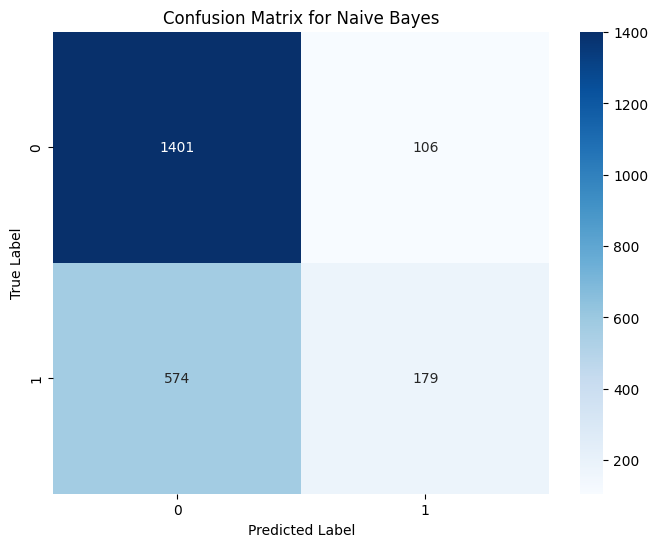

----------------------------------------------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.70
Precision: 0.57
Recall: 0.36
F1 score: 0.45
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1507
           1       0.57      0.36      0.45       753

    accuracy                           0.70      2260
   macro avg       0.65      0.61      0.62      2260
weighted avg       0.68      0.70      0.68      2260



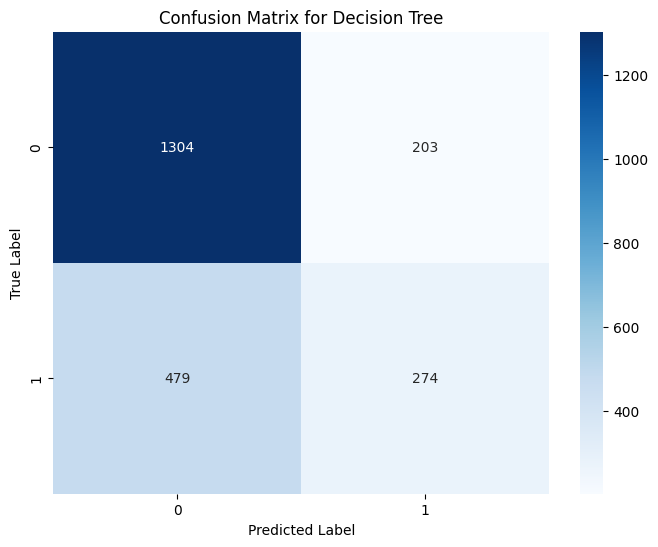

----------------------------------------------------------------------------------------------------
Model: Random Forest
Accuracy: 0.70
Precision: 0.57
Recall: 0.40
F1 score: 0.47
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1507
           1       0.57      0.40      0.47       753

    accuracy                           0.70      2260
   macro avg       0.65      0.62      0.63      2260
weighted avg       0.68      0.70      0.68      2260



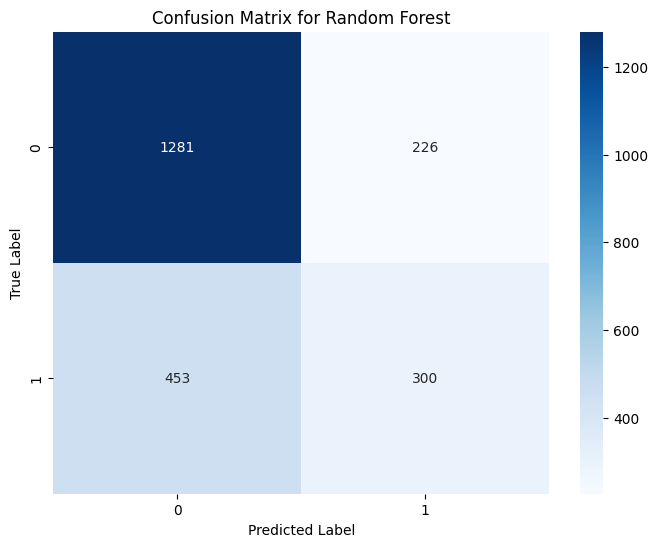

----------------------------------------------------------------------------------------------------
Model: Logistic Regression
Accuracy: 0.70
Precision: 0.64
Recall: 0.23
F1 score: 0.34
              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1507
           1       0.64      0.23      0.34       753

    accuracy                           0.70      2260
   macro avg       0.67      0.58      0.57      2260
weighted avg       0.69      0.70      0.65      2260



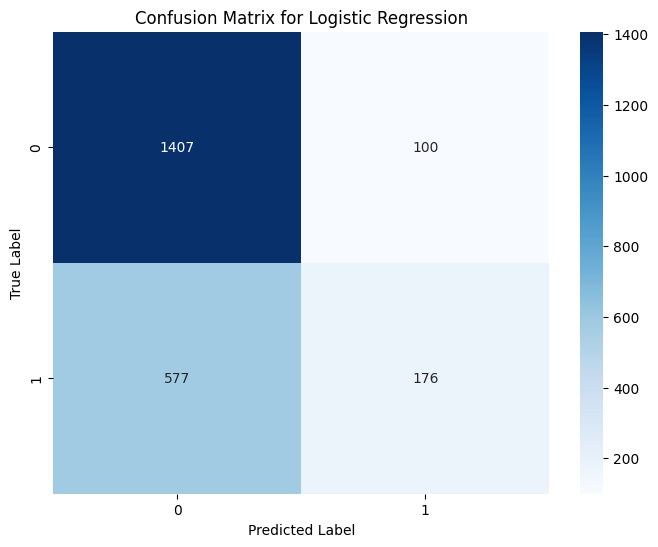

----------------------------------------------------------------------------------------------------
Model: Multilayer Neural Network
Accuracy: 0.73
Precision: 0.65
Recall: 0.40
F1 score: 0.49
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1507
           1       0.65      0.40      0.49       753

    accuracy                           0.73      2260
   macro avg       0.70      0.65      0.65      2260
weighted avg       0.72      0.73      0.71      2260



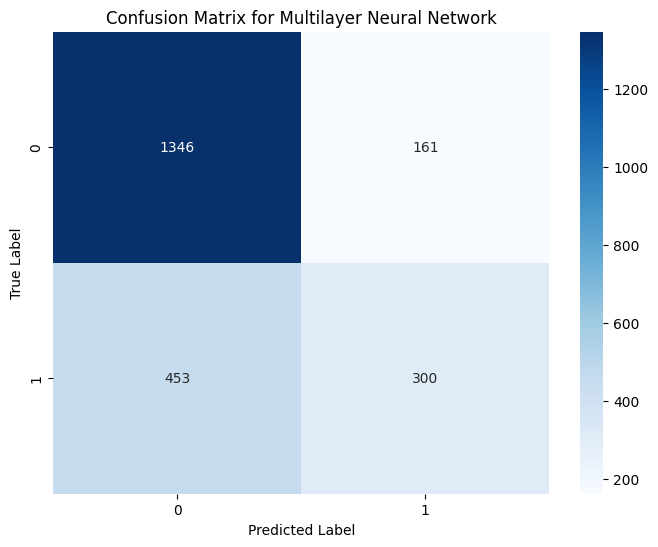

----------------------------------------------------------------------------------------------------
Model: SVM
Accuracy: 0.71
Precision: 0.64
Recall: 0.31
F1 score: 0.42
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1507
           1       0.64      0.31      0.42       753

    accuracy                           0.71      2260
   macro avg       0.68      0.61      0.62      2260
weighted avg       0.70      0.71      0.68      2260



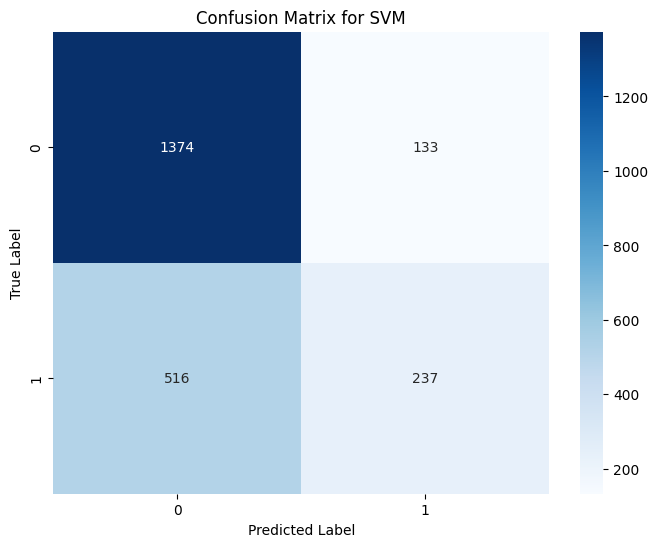

----------------------------------------------------------------------------------------------------
Model: Voting Ensemble
Accuracy: 0.71
Precision: 0.64
Recall: 0.30
F1 score: 0.41
              precision    recall  f1-score   support

           0       0.72      0.91      0.81      1507
           1       0.64      0.30      0.41       753

    accuracy                           0.71      2260
   macro avg       0.68      0.61      0.61      2260
weighted avg       0.69      0.71      0.67      2260



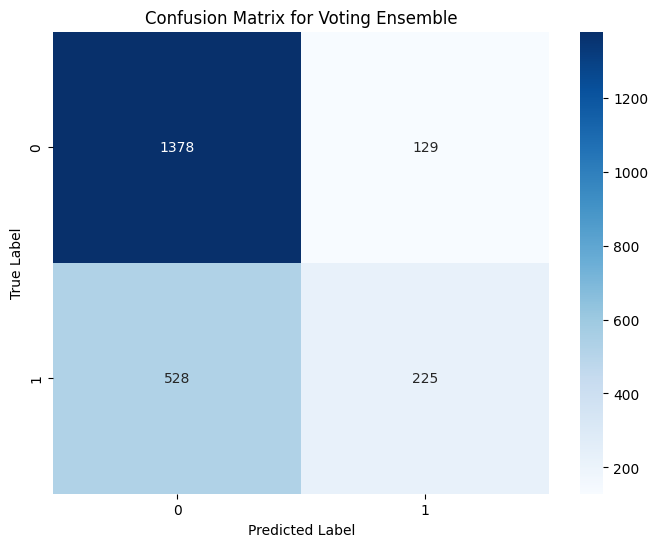

----------------------------------------------------------------------------------------------------
Model: Stacking Ensemble
Accuracy: 0.72
Precision: 0.63
Recall: 0.41
F1 score: 0.50
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1507
           1       0.63      0.41      0.50       753

    accuracy                           0.72      2260
   macro avg       0.69      0.65      0.65      2260
weighted avg       0.71      0.72      0.71      2260



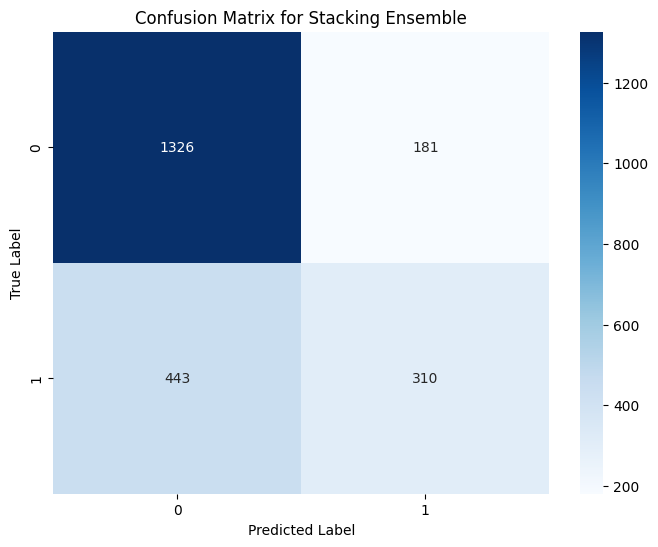

----------------------------------------------------------------------------------------------------


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
model_performance = {
    'Naive Bayes': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Decision Tree': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Random Forest': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Logistic Regression': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Multilayer Neural Network': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'SVM': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Voting Ensemble': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Stacking Ensemble': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
}

# Train, evaluate models, and plot confusion matrices
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_performance[name]['accuracy'] = accuracy_score(y_test, y_pred)
    model_performance[name]['precision'] = precision_score(y_test, y_pred)
    model_performance[name]['recall'] = recall_score(y_test, y_pred)
    model_performance[name]['f1'] = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {model_performance[name]['precision']:.2f}")
    print(f"Recall: {model_performance[name]['recall']:.2f}")
    print(f"F1 score: {model_performance[name]['f1']:.2f}")
    print(report)
    plot_confusion_matrix(cm, name)
    print('-' * 100)


In [12]:
def plot_confusion_matrix_grid(cm, model_name, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current axis if none is provided
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

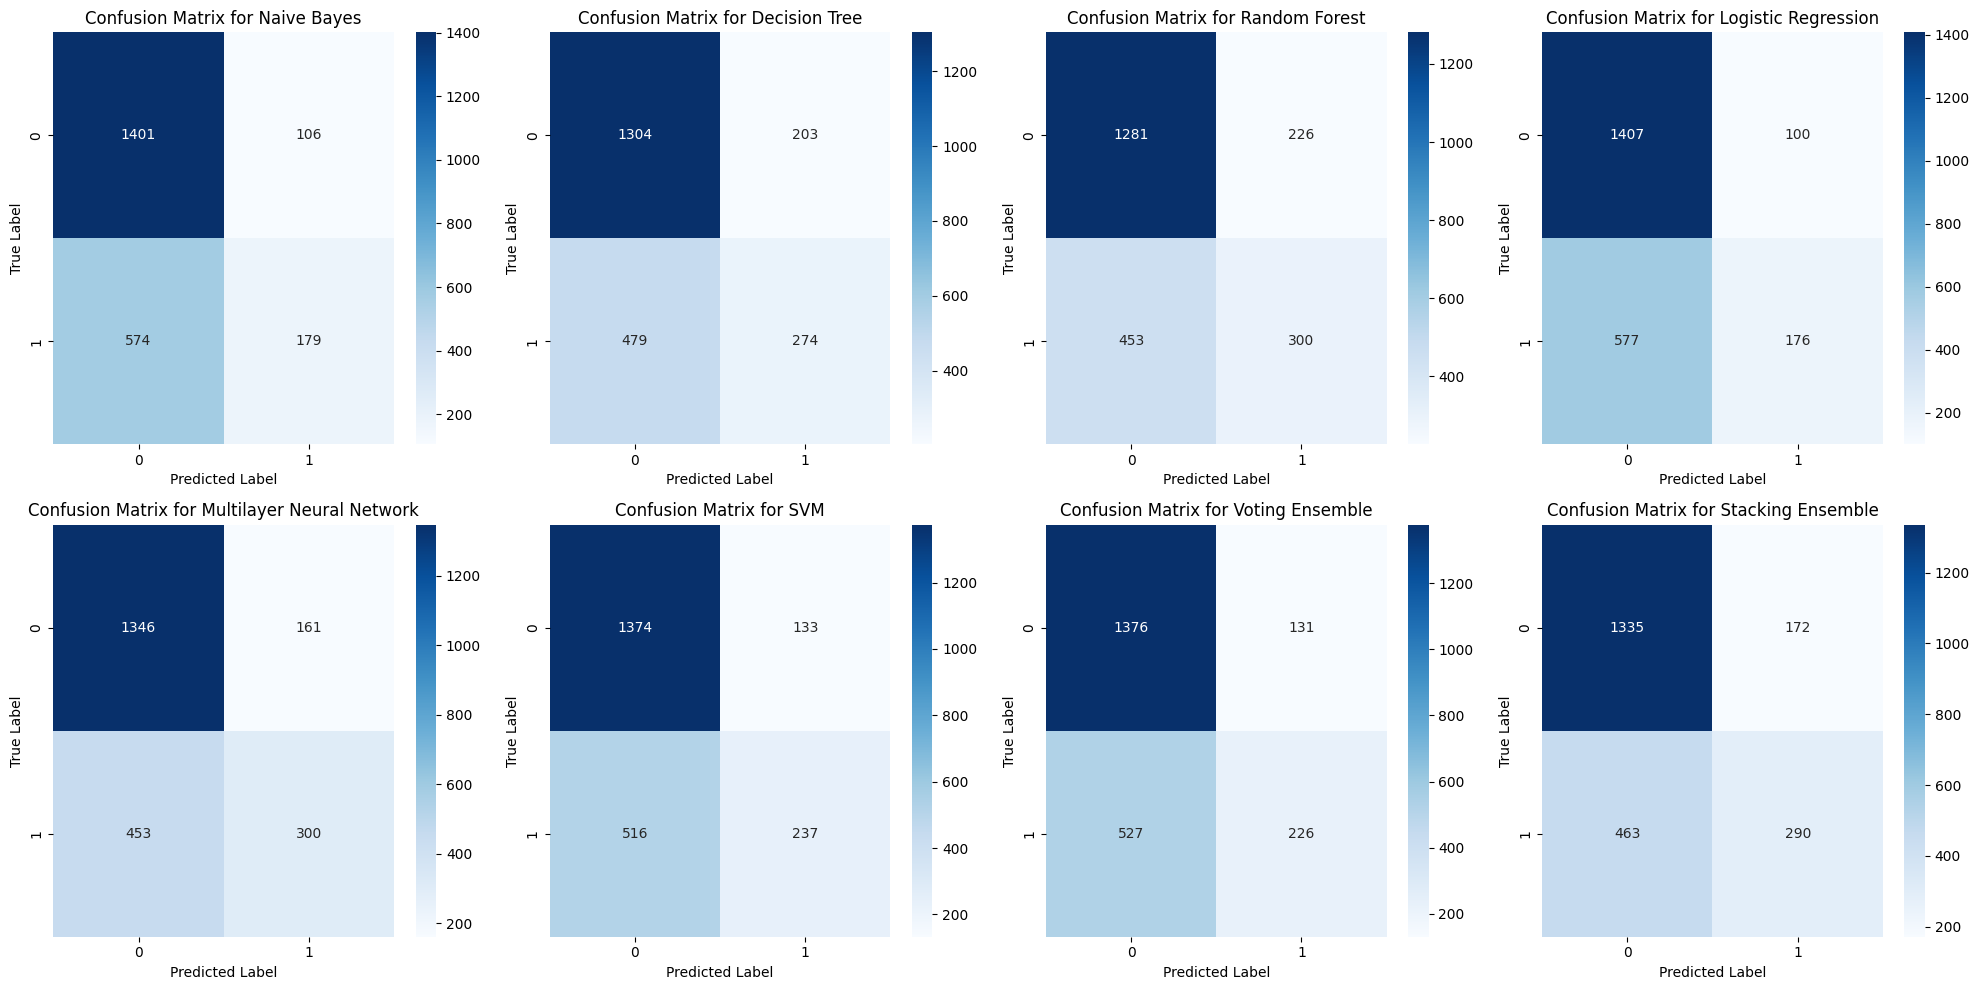

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
from sklearn.metrics import precision_score, recall_score, f1_score
model_performance = {
    'Naive Bayes': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Decision Tree': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Random Forest': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Logistic Regression': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Multilayer Neural Network': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'SVM': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Voting Ensemble': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0},
    'Stacking Ensemble': {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
}

# Train, evaluate models, and plot confusion matrices
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_performance[name]['accuracy'] = accuracy_score(y_test, y_pred)
    model_performance[name]['precision'] = precision_score(y_test, y_pred)
    model_performance[name]['recall'] = recall_score(y_test, y_pred)
    model_performance[name]['f1'] = f1_score(y_test, y_pred)
    ax = axes[idx]
    cm = confusion_matrix(y_test, y_pred)
    # print(f"Model: {name}")
    # print(f"Accuracy: {accuracy:.2f}")
    # print(f"Precision: {model_performance[name]['precision']:.2f}")
    # print(f"Recall: {model_performance[name]['recall']:.2f}")
    # print(f"F1 score: {model_performance[name]['f1']:.2f}")
    # print(report)
    plot_confusion_matrix_grid(cm, name, ax=ax)

plt.tight_layout()
plt.show()

In [14]:
# Function to plot the performance metrics
def plot_metrics(metrics_dict, metric_name):
    models = list(metrics_dict.keys())
    scores = [metrics_dict[model][metric_name] for model in models]
    colours = ['red' if model == 'Old Model' else 'skyblue' for model in models]

    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=colours)
    plt.xlabel('Classification Models')
    plt.ylabel(f'{metric_name} Score')
    plt.title(f'Comparison of Model {metric_name}')
    plt.ylim([0, 1])  # Adjust the range of y-axis to fit your actual scores
    plt.xticks(rotation=45)
    plt.show()

In [15]:
def compute_old_recidivism_pred(old_pred):
    if(old_pred == 'High'): return 1
    else: return 0

In [16]:
old_predictions = df['score_text']
old_pred = old_predictions.apply(compute_old_recidivism_pred)
actual_val = df['is_recid']
old_accuracy = accuracy_score(actual_val, old_pred)
old_precision = precision_score(actual_val, old_pred)
old_recall = recall_score(actual_val, old_pred)
old_f1 = f1_score(actual_val, old_pred)
print("Old Model's Performance Metrics:")
print(f"Accuracy: {old_accuracy:.2f}")
print(f"Precision: {old_precision:.2f}")
print(f"Recall: {old_recall:.2f}")
print(f"F1 score: {old_f1:.2f}")

Old Model's Performance Metrics:
Accuracy: 0.68
Precision: 0.53
Recall: 0.31
F1 score: 0.39


In [17]:
model_performance['Old Model'] = {}
model_performance['Old Model']['accuracy'] = old_accuracy
model_performance['Old Model']['precision'] = old_precision
model_performance['Old Model']['recall'] = old_recall
model_performance['Old Model']['f1'] = old_f1

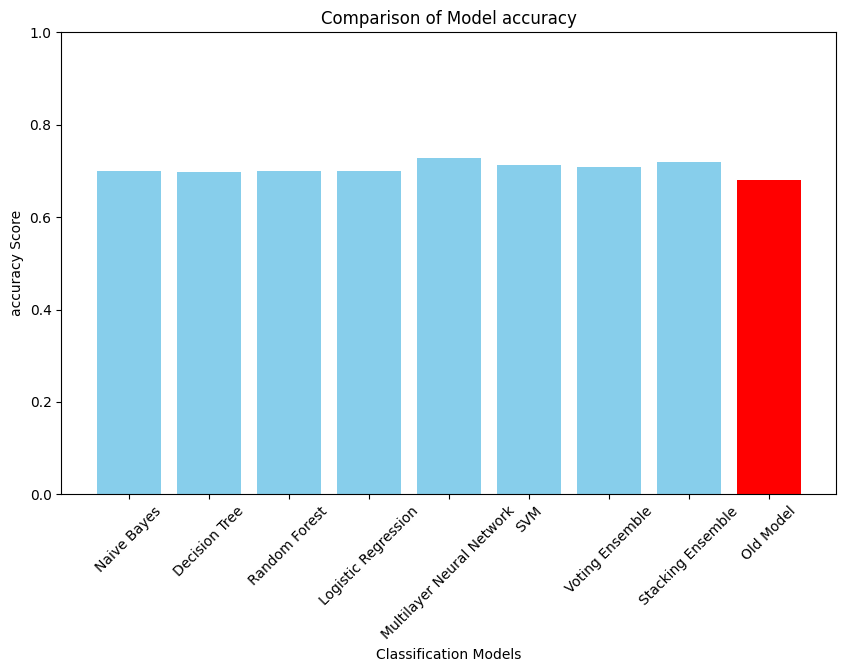

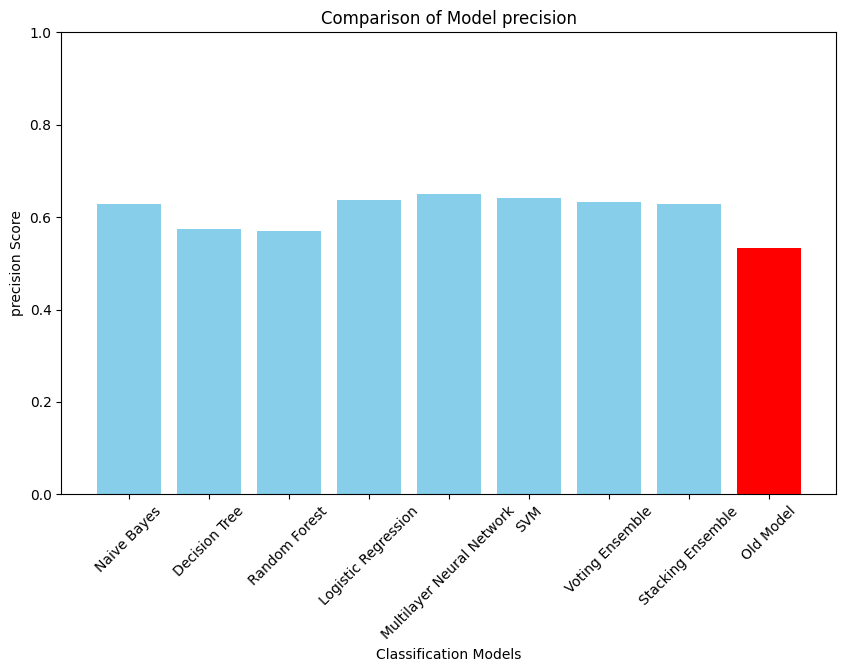

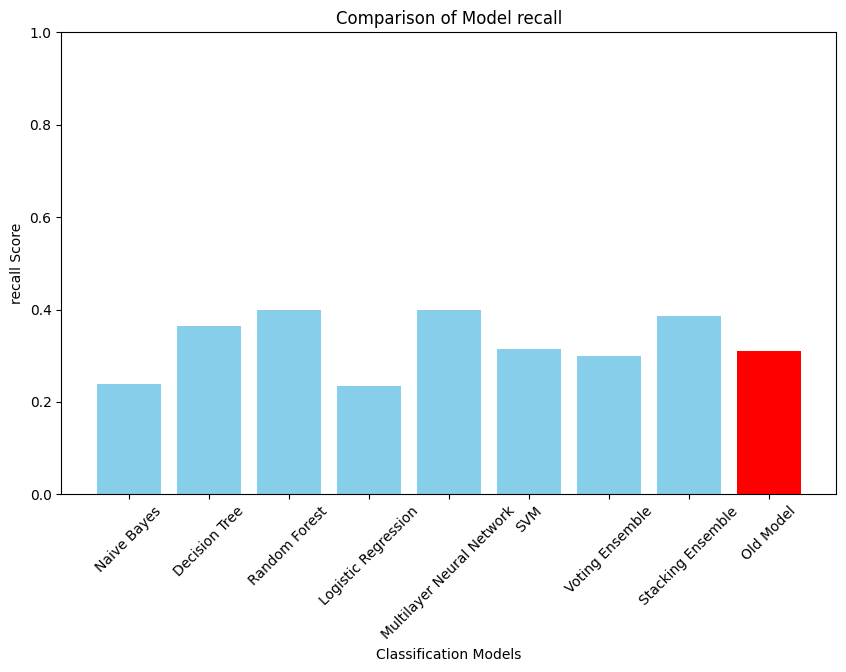

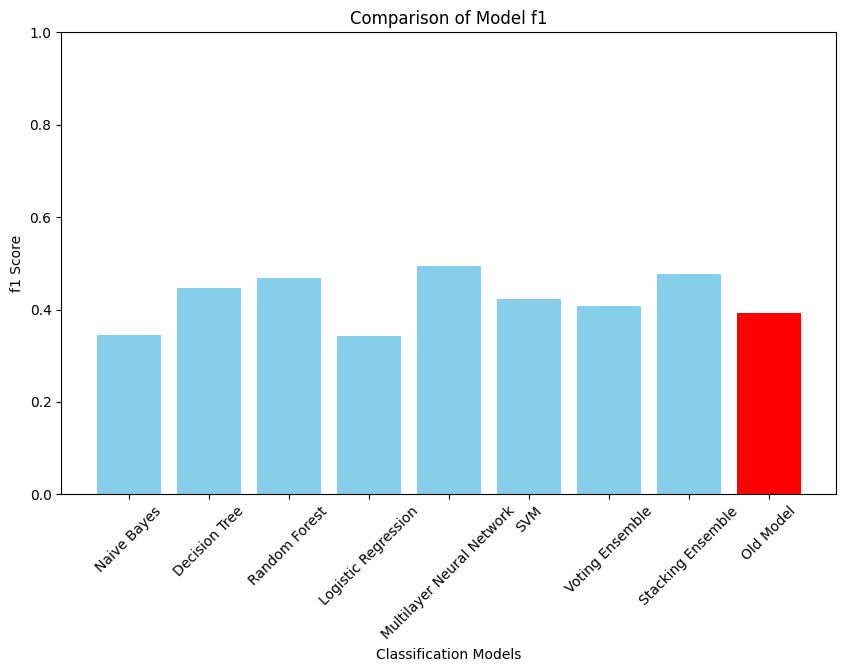

In [18]:
# Plot each metric
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    plot_metrics(model_performance, metric)